# Проектирование экспериментов

Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

Каждая история болезни характеризуется следующими признаками:

* No_show — пациент не пришёл на приём;
* Gender — пол пациента;
* ScheduledDay — день, когда планируется встреча;
* AppointmentDay — реальная дата встречи;
* Age — возраст пациента;
* Neighbourhood — район проживания каждого пациента;
* Scholarship — получает ли пациент стипендию;
* …и несколько других признаков.

1. Первым этапом данных является загрузка данных: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind, shapiro, f_oneway, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('data/KaggleV2-May-2016.csv')

Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

- Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
- Кто не появляется чаще — мужчины или женщины?

2. Для ответа на эти и другие подобные вопросы используется EDA.

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

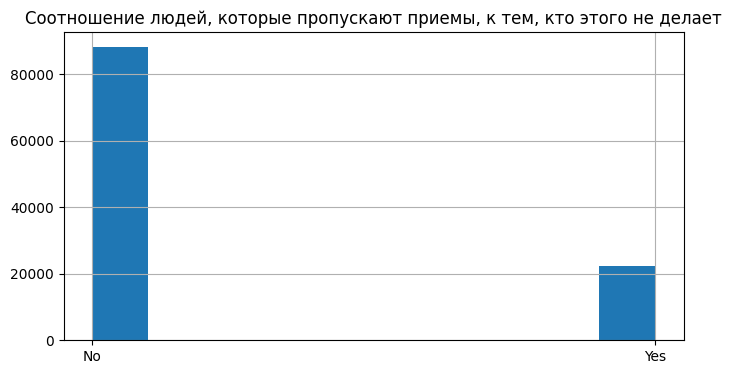

In [3]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

Или, если мы хотим получить точную пропорцию, — с помощью метода `value_counts()`:

In [4]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [5]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.

3. После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для one-hot кодировки можно воспользоваться методом `get_dummies()` библиотеки pandas:

In [6]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

4. После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. Об этом вы узнаете в будущих модулях!  

Предположим, вы несколько раз обучили модель с разными параметрами, подобрали наилучшие и достигли $accurasy > 0.9$. То есть доля верных предсказаний превышает 90 %. Также вы узнали, что наибольший вклад в модель вносят такие признаки, как пол, регион и факт наличия стипендии. Про влияние пола на результат вы догадались во время проведения EDA, регион кажется тоже понятным фактором: люди в крупных городах больше склонны приходить на последующий назначенный прием, а вот факт наличия стипендии — не такой очевидный фактор. 

Это подтверждает тезис о том, что модели машинного обучения могут рассматриваться как чёрный ящик: нечто, куда мы кладём свои данные и получаем предсказание. Не всегда результаты прогнозов легко интерпретируемы. Обычно существует трэйд-офф между качеством модели и её интерпретируемостью: чем сложнее модель, тем выше, но менее очевиден её результат.    

### Логирование экспериментов

Как вы уже знаете, в процессе проведения эксперимента по машинному обучению можно использовать функцию print() для просмотра выходных данных экспериментов, таких как уровень корреляции данных в выборке, результат тестирования статистической гипотезы и так далее. 

Однако время от времени выводить результат на экран с помощью функции print() бесполезно, так как при запуске следующего эксперимента вы потеряете все результаты предыдущего эксперимента, если не запишете их вручную в документ. 

Таким образом, сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

Лог (log) — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

Для логирования в Python используется модуль logging. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [7]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

* уровень;
* обработчик (хендлер);
* формат логирования. 

С импортированным модулем logging вы можете использовать так называемый «logger» для логирования сообщений, которые вы хотите видеть (вместо вывода их на экран командой print()). 

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

* отладка;
* информация;
* предупреждение;
* ошибка;
* критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [8]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (WARNING/ERROR/CRITICAL). root — имя логгера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (:), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

Обратите внимание, что сообщения debug() и info() не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на ОТЛАДКУ (DEBUG). 

Чтобы сделать это, нужно сначала сбросить настройки библиотеки logging, перезапустив наш ноутбук. В VS Code это делается с помощью кнопки перезапуска:
![Picture1](data/dst-eda-6-extra-02.png)

Другой вариант сбросить настройки logging — воспользоваться функцией `reload()` из вспомогательной системной библиотеки importlib:

In [9]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'c:\\Users\\incon\\AppData\\Local\\Programs\\Python\\Python39\\lib\\logging\\__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [10]:
logging.basicConfig(level=logging.DEBUG)

Мы настроили уровень ведения журнала DEBUG. Это означает, что теперь будут отслеживаться только сообщения этого уровня (DEBUG) и выше. В результате выполнения кода логирования мы должны получить следующие сообщения:

In [11]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Как видно из результата выполнения кода, теперь в консоль выводятся лог-сообщения всех уровней.

Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции print(). Обычно логирование производится в специальные лог-файлы, для этого используются обработчики (хендлеры) логов. Давайте рассмотрим пример логирования в файл.

Функция обработчиков ведения журналов состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами logger может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по email одновременно. Подробнее ознакомиться с видами хендлеров можно здесь.

Обработчики являются классами модуля logging. Нам понадобится обработчик FileHandler, который возьмёт запись/сообщение журнала и добавит его в файл журнала `log_file.log`:

In [12]:
logging.FileHandler('data/log_file.log')

<FileHandler c:\Users\incon\OneDrive\Рабочий стол\IDE\DSPR_119\EDA_6\data\log_file.log (NOTSET)>

Как мы уже сказали, типичный формат лога выглядит так: `уровень: имя: сообщение`. Однако его можно изменить.

Существуют различные способы форматирования записи журнала. Вы можете включить дату, время и уровень ведения журнала в свой формат, чтобы знать, когда журнал был отправлен и на каком уровне. В приведённом ниже примере показано, как можно настроить формат записей журнала. Так как мы вновь переопределяем настройки библиотеки logging, то не забудем сбросить конфигурацию.

In [13]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-05-02 19:23:52,596: Check


Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

Теперь, когда вы понимаете основы модуля logging в Python, посмотрим, как можно его использовать при проведении экспериментов по машинному обучению. Давайте залогируем информацию о нашем датасете Medical Appointment No Shows. 

Создадим новый ipynb файл, в котором будем выполнять логирование. Скачать оригинальный ноутбук вы можете по ссылке.

Создадим функцию `get_logger()` для генерации лог-файла и записи в него информации.

In [14]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, get_logger принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. Для того, чтобы освежить в памяти знания по работе с файлами, вы можете вернуться к Блоку 2 нашего курса («Подгрузка данных»).  

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды mkdir:

In [15]:
#!mkdir logs

Создадим лог-файл и запишем туда информацию о датасете.

In [16]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-05-02 19:23:52,715: Data
INFO: 2023-05-02 19:23:52,716: Data shape (110527, 14)
INFO: 2023-05-02 19:23:52,729: Percentage of women: 0.653882342398853
INFO: 2023-05-02 19:23:52,741: Percentage of men: 0.346117657601147


В директории logs появится файл data.logs. Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [17]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2023-05-02 19:23:52,771: Data shape is incorrect!


## Comet.ml

Comet.ml — это онлайн-платформа, позволяющая отслеживать эксперименты. Основное преимущество Comet состоит в том, что с её помощью можно легко построить панель отчётности и систему мониторинга.

	
Comet предоставляет следующие возможности:

* сравнивать эксперименты с точки зрения метрик, параметров и так далее;
* следить за моделью от создания до вывода в продакшен;
* делиться своим проектом с другими людьми, которые в режиме реального времени будут следить за результатами;
* строить отчёты исходя из результатов эксперимента;
* оставить проект приватным или сделать его общедоступным.

Для начала работы с платформой Comet.ml необходимо зарегистрировать бесплатную учётную запись. После этого вы сможете создавать как публичные, так и приватные проекты. 

Платформа генерирует новый API для эксперимента, который можно использовать в коде Python:

In [ ]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="FMGcghRMqkhXI1wlKqq6zX7bQ",
    project_name="medical-appointment",
    workspace="inconstant1313",
)


DEBUG: 2023-05-02 19:23:53,147: No INI file found: []
DEBUG: 2023-05-02 19:23:53,148: No INI file found: ['./.comet.config']
DEBUG: 2023-05-02 19:23:53,148: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-05-02 19:23:53,149: No INI file found: ['~/.comet.config']
DEBUG: 2023-05-02 19:23:53,149: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-05-02 19:23:53,151: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-02 19:23:53,152: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-02 19:23:53,153: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-05-02 19:23:53,153: Found nothing--returning NO_VALUE
DEBUG: 2023-05-02 19:23:53,156: No INI file found: []
DEBUG: 2023-05-02 19:23:53,157: No INI file found: ['./.comet.config']
DEBUG: 2023-05-02 19:23:53,158: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-05-02 19:23:53,159: No INI file found: ['~/.come

DEBUG: 2023-05-02 19:23:59,732: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/git/metadata HTTP/1.1" 200 55
DEBUG: 2023-05-02 19:23:59,998: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/output HTTP/1.1" 200 55
DEBUG: 2023-05-02 19:24:00,209: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-05-02 19:24:05,742: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-05-02 19:24:05,759: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-05-02 19:24:05,760: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-02 19:24:05,761: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-02 19:24:05,761: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-05-02 19:24:05,761: Found nothing--returning NO_VALUE
DEBUG: 2023-05-02 19:24:1

Класс Experiment — это интерфейс локального кода для Comet. Он определяет множество методов, описанных в официальной документации Comet. Платформа позволяет хранить информацию о коде, логировать графики, гиперпараметры модели (о них вы узнаете дальше в курсе), метрики. 

Давайте рассмотрим некоторые популярные методы:

* log_metric() и log_metrics() — логируют в эксперименте одну или несколько оценочных метрик, таких как accuracy;
* log_figure() — логирует рисунок;
* display() — создаёт интерактивную среду в Jupyter, показывающую приборную панель Comet как вывод ячейки;
* end() — если эксперимент выполняется в Jupyter, этот метод указывает, что эксперимент завершён.

После завершения эксперимента Comet предоставляет информационную панель, где можно увидеть все залогированные в коде метрики, цифры, параметры и так далее.

Показатели оценки отображаются автоматически. Например, если эксперимент состоит из нескольких шагов, можно легко нарисовать графики, показывающие метрики в зависимости от количества шагов.

Ниже представлен пример графика, иллюстрирующего изменение accuracy на каждом шаге обучения нейронной сети (про нейронные сети вы узнаете далее по курсу). 

Итак, Comet.ml — это платформа для экспериментов с машинным обучением, которую специалисты по данным используют для отслеживания, сравнения и объяснения своих экспериментов по машинному обучению. Она обеспечивает воспроизведение моделей, простое обслуживание рабочего процесса машинного обучения и бесперебойную совместную работу на протяжении всего жизненного цикла проекта.  